In [1]:
# connect to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# open file from drive
with open("/content/drive/MyDrive/Colab Notebooks/biz_from_txns_12.csv", 'r') as csvfile:
    print(f"First line (header) looks like this:\n\n{csvfile.readline()}")
    print(f"Each data point looks like this:\n\n{csvfile.readline()}")

First line (header) looks like this:

"category","cash_sale_amt","cash_sale_txn","cash_sale_custs","credit_sale_amt","credit_sale_txn","credit_sale_custs","credit_sale_ret_amt","credit_sale_ret_txn","credit_sale_ret_custs","new_cust_added","cust_txn_days","cash_purchase_amt","cash_purchase_txn","cash_purchase_supps","credit_purchase_amt","credit_purchase_txn","credit_purchase_supps","credit_purchase_ret_amt","credit_purchase_ret_txn","credit_purchase_ret_supps","new_supp_added","supp_txn_days","malik_dilo_amt","malik_dilo_txn","malik_nilo_amt","malik_nilo_txn","malik_txn_days","cash_adj_amt","cash_adj_txn","expense_amt","expense_txn","dokan_txn_days","sale_ticket","cash_sale_ticket","credit_sale_ticket","purchase_ticket","cash_purchase_ticket","ops_ticket","sms_used","tagada_sms_used","link_sms_used","sms_used_days","all_cust_added","all_supp_added","versions_exp","version_now","days_with_tk","dist_from_dhaka","sec_spent","mobile_no","shop_name"

Each data point looks like this:

GROCE

In [3]:
# import necessary libraries
import os
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import initializers

In [4]:
# view data
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/biz_from_txns_12.csv')
print(df.head(5))

   category  cash_sale_amt  cash_sale_txn  cash_sale_custs  credit_sale_amt  \
0   GROCERY            0.0              0                0              0.0   
1  PHARMACY            0.0              0                0          34273.0   
2   GROCERY            0.0              0                0          42046.0   
3   GROCERY         2000.0              1                1           7529.0   
4   GROCERY            0.0              0                0          21680.0   

   credit_sale_txn  credit_sale_custs  credit_sale_ret_amt  \
0                0                  0                  0.0   
1              138                 59              23733.0   
2              597                 60              43862.0   
3               73                 22               2523.0   
4              293                 39              14364.0   

   credit_sale_ret_txn  credit_sale_ret_custs  ...  sms_used_days  \
0                    0                      0  ...              0   
1             

In [5]:
# categories into numerics
categories=list(pd.unique(df['category']))
df['category']=[categories.index(item) for item in list(df['category'])]
print(df.head(5))

   category  cash_sale_amt  cash_sale_txn  cash_sale_custs  credit_sale_amt  \
0         0            0.0              0                0              0.0   
1         1            0.0              0                0          34273.0   
2         0            0.0              0                0          42046.0   
3         0         2000.0              1                1           7529.0   
4         0            0.0              0                0          21680.0   

   credit_sale_txn  credit_sale_custs  credit_sale_ret_amt  \
0                0                  0                  0.0   
1              138                 59              23733.0   
2              597                 60              43862.0   
3               73                 22               2523.0   
4              293                 39              14364.0   

   credit_sale_ret_txn  credit_sale_ret_custs  ...  sms_used_days  \
0                    0                      0  ...              0   
1             

In [6]:
# full data
x=df.iloc[:, 1:50]
y=df.iloc[:, 0].values

# check for nan in full data 
# print(np.isnan(x).any())
# normalize
normalized_x=(x-x.min())/(x.max()-x.min())
# check for nan in normalized data
print("nan found in cols:")
print(np.isnan(normalized_x).any())
# count of nan in normalized data
print()
print("nan found:")
print(normalized_x.isnull().sum().sum())
# inspect column with nan 
print() 
print("inspection:")
print(x['new_supp_added'].max())

# replace nan with 0, extract values
normalized_x=normalized_x.fillna(0).values

# training data
x_train=normalized_x[0:38000, :]
y_train=y[0:38000]

# validation data
x_test=normalized_x[38000:, :]
y_test=y[38000:]

nan found in cols:
cash_sale_amt                False
cash_sale_txn                False
cash_sale_custs              False
credit_sale_amt              False
credit_sale_txn              False
credit_sale_custs            False
credit_sale_ret_amt          False
credit_sale_ret_txn          False
credit_sale_ret_custs        False
new_cust_added               False
cust_txn_days                False
cash_purchase_amt            False
cash_purchase_txn            False
cash_purchase_supps          False
credit_purchase_amt          False
credit_purchase_txn          False
credit_purchase_supps        False
credit_purchase_ret_amt      False
credit_purchase_ret_txn      False
credit_purchase_ret_supps    False
new_supp_added               False
supp_txn_days                False
malik_dilo_amt               False
malik_dilo_txn               False
malik_nilo_amt               False
malik_nilo_txn               False
malik_txn_days               False
cash_adj_amt                 False
c

In [7]:
def build_model():
    
    # define model
    model=tf.keras.models.Sequential([ 
        # use tf.keras.layers.Dropout(0.1) for regularization
        
        tf.keras.layers.Dense(47, activation=tf.nn.relu, kernel_initializer=tf.keras.initializers.GlorotUniform(), input_dim=49),
        tf.keras.layers.Dense(47, activation=tf.nn.relu, kernel_initializer=tf.keras.initializers.GlorotUniform()),
        tf.keras.layers.Dense(45, activation=tf.nn.relu, kernel_initializer=tf.keras.initializers.GlorotUniform()),
        tf.keras.layers.Dense(35, activation=tf.nn.relu, kernel_initializer=tf.keras.initializers.GlorotUniform()),
        tf.keras.layers.Dense(20, activation=tf.nn.relu, kernel_initializer=tf.keras.initializers.GlorotUniform()),
        tf.keras.layers.Dense(7, activation=tf.nn.softmax)
    ]) 

    # compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy']) 

    return model

In [8]:
# fit model and save training history
model=build_model()
history=model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
1188/1188 [==============================] - 9s 7ms/step - loss: 1.4979 - accuracy: 0.4037 - val_loss: 1.4200 - val_accuracy: 0.4502
Epoch 2/50
1188/1188 [==============================] - 7s 6ms/step - loss: 1.4317 - accuracy: 0.4393 - val_loss: 1.4051 - val_accuracy: 0.4573
Epoch 3/50
1188/1188 [==============================] - 3s 3ms/step - loss: 1.4154 - accuracy: 0.4507 - val_loss: 1.4159 - val_accuracy: 0.4350
Epoch 4/50
1188/1188 [==============================] - 3s 3ms/step - loss: 1.4010 - accuracy: 0.4572 - val_loss: 1.4223 - val_accuracy: 0.4323
Epoch 5/50
1188/1188 [==============================] - 3s 2ms/step - loss: 1.3962 - accuracy: 0.4618 - val_loss: 1.3879 - val_accuracy: 0.4659
Epoch 6/50
1188/1188 [==============================] - 3s 2ms/step - loss: 1.3818 - accuracy: 0.4683 - val_loss: 1.4160 - val_accuracy: 0.4432
Epoch 7/50
1188/1188 [==============================] - 3s 3ms/step - loss: 1.3672 - accuracy: 0.4787 - val_loss: 1.3880 - val_accuracy:

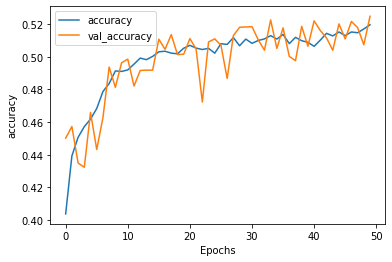

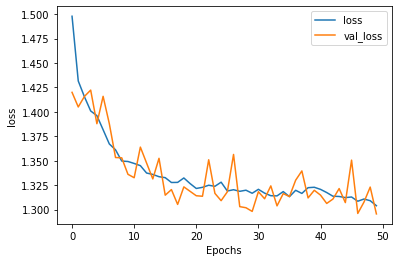

In [9]:
# plot learning curves
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [10]:
# probabilies against all classes for selective validation data
pred_probabilities=model.predict(normalized_x[38000:38100, :])

# predictions against selective validation data
pred_classes=[categories[item] for item in np.argmax(pred_probabilities, axis=1)]
val_shop_names=list(df['shop_name'])[38000:38100]

for i in range(0, len(val_shop_names)): 
  print(val_shop_names[i]+ ": "+pred_classes[i])

print()

# if predictions match
print(np.argmax(pred_probabilities, axis=1)==y[38000:38100])

4/4 [==============================] - 0s 3ms/step
সামিয়া এন্ড সাদিয়া ফ্যাশন: PHARMACY
প্রোঃহাফিজুর মায়ের দোয়া স্টোর সৈয়দ পুর বাজার: GROCERY
জোসনা কনফেকশনারী এন্ড ষ্টোর: MFS_MOBILE_RECHARGE
বরুনা ড্রাগ হাউজ: PHARMACY
নাইম ভ্যারাইটি ষ্টোর: GROCERY
আল-আমিন ভ্যারাইটিজ ষ্টোর এন্ড টেলিকম: PHARMACY
মেসার্স আজমীর স্টোর প্রোপাইটর মাসুদ: MFS_MOBILE_RECHARGE
জয়নাল স্টোর: GROCERY
Bashar account: GROCERY
মাসুম টেলিকম: MFS_MOBILE_RECHARGE
এরশাদুল ইসলাম: GROCERY
Shakil Store: GROCERY
SHAZ PHARMA: GROCERY
আতিশা আন্তি টেলিকম এন্ড জেনারেল স্টোর: MFS_MOBILE_RECHARGE
বেলাল মেডিকেল হল: PHARMACY
মা গার্মেন্টস এন্ড বস্তালয় ও সু ষ্টোর: GROCERY
অপি কম্পিউটার এন্ড ডিস সেন্টার: GROCERY
অনয় এন্টারপ্রাইজ: MFS_MOBILE_RECHARGE
বিসমিল্লাহ ফার্মেসী: MFS_MOBILE_RECHARGE
মাহাবুব: GROCERY
খান এন্টারপ্রাইজ: PHARMACY
ডিজিটাল এন্টারপ্রাইজ: PHARMACY
M/s Jannat Pharmacy: PHARMACY
MAHMOOD NAWAZ BABU: MFS_MOBILE_RECHARGE
Minhaj Telecom: GROCERY
আনজুম মেডিফার্মা: MFS_MOBILE_RECHARGE
Chittagong Home Tex: GROCERY
মহেশখালী ঝাল